<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/timbre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Timbre and Harmonics

In this notebook, we explore timbre, or the harmonic frequency structure that causes different instruments to have their unique sounds. To begin, run the following cell:

In [ ]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-06-02 18:49:15--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.2’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-06-02 18:49:15 (292 MB/s) - ‘lib6003-0.0.4.tar.gz.2’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-i

Now be sure to hit Runtime ->  Restart runtime and run the next block.

In [ ]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e, log
import pyaudio
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import IPython

Here we focus on timbre, or the harmonic structure of a signal that makes it sound like different instruments. To begin, we have included four files: an oboe, a saxophone, a trumpet, and a violin all playing the same note, C4. Run the following block of code to download the files:

In [ ]:
!curl -s https://raw.githubusercontent.com/nadah09/MachineAuditionHighSchool/main/files/oboe_C4.wav > oboe_C4.wav
!curl -s https://raw.githubusercontent.com/nadah09/MachineAuditionHighSchool/main/files/trumpet_C4.wav > trumpet_C4.wav
!curl -s https://raw.githubusercontent.com/nadah09/MachineAuditionHighSchool/main/files/sax_C4.wav > sax_C4.wav
!curl -s https://raw.githubusercontent.com/nadah09/MachineAuditionHighSchool/main/files/violin_C4.wav > violin_C4.wav


Below you can play each of these files to hear what they sound like.

In [ ]:
print("OBOE")
IPython.display.Audio('oboe_C4.wav')


OBOE


In [ ]:
print("TRUMPET")
IPython.display.Audio('trumpet_C4.wav')

TRUMPET


In [ ]:
print("SAXOPHONE")
IPython.display.Audio('sax_C4.wav')

SAXOPHONE


In [ ]:
print("VIOLIN")
IPython.display.Audio('violin_C4.wav')

VIOLIN


Now, we know that each of these files is playing the same note, meaning that each of these signals have the same fundamental frequency. However, we get these different instrument sounds through the higher harmonics of each note. We can see this by using our Fourier Transform as before, to view where the frequencies are in each of these files. Below we have written some code that will take in each of these files, and extract their frequencies.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


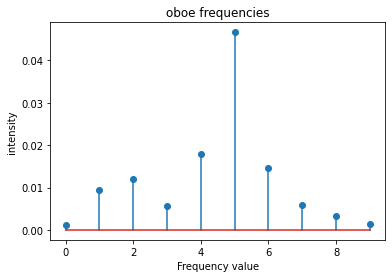

/usr/local/lib/python3.7/dist-packages/lib6003-0.0.4-py3.7.egg/lib6003/wavfile.py:302: WavFileWarning: Chunk (non-data) not understood, skipping it.
  "Chunk (non-data) not understood, skipping it.", WavFileWarning


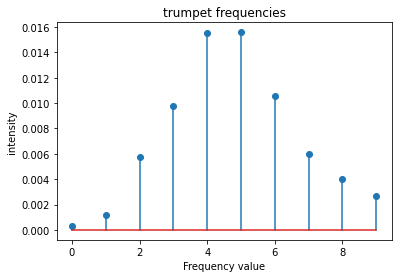

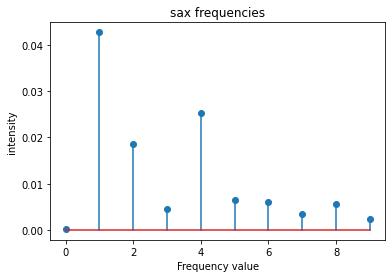

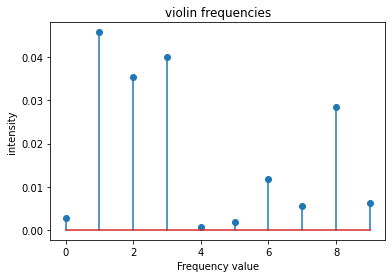

In [67]:
instruments = ["oboe", "trumpet", "sax", "violin"]
for instrument in instruments:
  example_note, sampling_rate = wav_read(instrument + "_C4.wav")
  samples = []
  ks = []
  oboe = []
  oboedict = {}
  Omega = 261.63
  period = 2.0*pi/Omega
  Omega = 261.63*2*pi/sampling_rate
  for k in range(0, 10):
      x = 0
      ks.append(k)
      for sample in range(10000, 10000+int(sampling_rate*period)):
          x += (example_note[sample]*(e**(-sample*k*Omega*1j)))/(int(period*sampling_rate))
      oboe.append(x)
      oboedict[k] = x
  oboeabs = [abs(i) for i in oboe]
  plt.title(instrument + " frequencies")
  plt.xlabel("Frequency value")
  plt.ylabel("intensity")
  plt.stem(ks, oboeabs)
  plt.show()



Here we see something very important -- each of these has its first frequency present at 261 Hz, which is the frequency value for a C4. This is how we hear a C4 in each file -- however, each instrument sounds different due to the higher frequencies present in the file. Here we see that the intensity of the frequencies after C4 change drastically between the files, which is what gives us the unique sounds of each instrument. We can also use this to see how different or similar different instruments are -- for example, oboe and trumpet have very similar frequency graphs, but oboe and violin do not.  We can further view this difference by computing a spectogram below:

In [ ]:
#SPECTROGRAM CODE: DO NOT MODIFY
window_size = 2**10
step_size = 2**10
j = 1j

def fft(x):
    if len(x) == 1:
        return x
    N = len(x)
    x_even = x[0::2]
    x_odd = x[1::2]
    X_even = fft(x_even)
    X_odd = fft(x_odd)

    return [1/2*(X_even[i]+e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)] + [1/2*(X_even[i]-e**(-2*j*pi*i/N)*X_odd[i]) for i in range(N//2)]
  

def hann(x):
    out = []
    for i in range(x):
        temp = cos(2*pi*i/(x-1))
        out.append(1/2*(1-temp))
    return out

def transpose(x):
    return [[i[j] for i in x] for j in range(len(x[0]))]

def k_to_hz(k, window_size, step_size, sample_rate):
    # return the frequency in Hz associated with bin number k in an STFT with
    # the parameters given above.
    return k*sample_rate/window_size


def hz_to_k(freq, window_size, step_size, sample_rate):
    # return the k value associated with the given frequency in Hz, in an STFT
    # with the parameters given above, rounded to the nearest integer.
    return round(window_size*freq/sample_rate)


def timestep_to_seconds(i, window_size, step_size, sample_rate):
    # return the real-world time in seconds associated with the center of the
    # ith window in an STFT using the parameters given above, rounded to the
    # nearest .01 seconds.
    return round((i*step_size+window_size/2)/sample_rate, 2)

def stft(x, window_size, step_size, sample_rate):
    nsteps = (len(x)-window_size)//step_size + 1
    out = []
    hann_ = hann(window_size)
    for i in range(nsteps):
        samples = x[i*step_size:i*step_size+window_size]
        samples = [samples[i]*hann_[i] for i in range(window_size)]
        fft_ = fft(x[i*step_size:i*step_size+window_size])
        out.append(fft_)

    return out

def spectrogram(X, window_size, step_size, sample_rate):
    return [[abs(i)**2 for i in j] for j in transpose(X)]


def plot_spectrogram(sgram, window_size, step_size, sample_rate):
    # the code below will uses matplotlib to display a spectrogram.  it uses
    # your k_to_hz and timestep_to_seconds functions to label the horizontal
    # and vertical axes of the plot.
    # amplitudes are plotted on a log scale, since human perception of loudness
    # is roughly logarithmic.
    width = len(sgram[0])
    height = len(sgram)//16+1  # only plot values up to N/2

    tmp = [[(float('inf') if 0 >= x else x) for x in row] for row in sgram[:height+1]]
    smallest = min(min(row) for row in tmp)
    plt.imshow([[log(smallest if i == 0 else i) for i in j] for j in sgram[:height+1]], aspect=width/height)

    #plt.imshow([[log(i) for i in j] for j in sgram[:height+1]], aspect=width/height)
    plt.axis([0, width-1, 0, height-1])

    ticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(timestep_to_seconds(x, window_size, step_size, sample_rate)))
    plt.axes().xaxis.set_major_formatter(ticks)
    ticks = ticker.FuncFormatter(lambda y, pos: '{0:.0f}'.format(k_to_hz(y, window_size, step_size, sample_rate)))
    plt.axes().yaxis.set_major_formatter(ticks)

    plt.xlabel('time [s]')
    plt.ylabel('frequency [Hz]')

    plt.colorbar()
    plt.show()

Using this code, we can visualize the spectrograms for each C4 file:

/usr/local/lib/python3.7/dist-packages/lib6003-0.0.4-py3.7.egg/lib6003/wavfile.py:302: WavFileWarning: Chunk (non-data) not understood, skipping it.
  "Chunk (non-data) not understood, skipping it.", WavFileWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

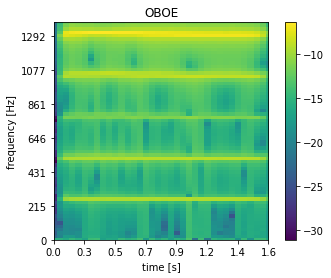

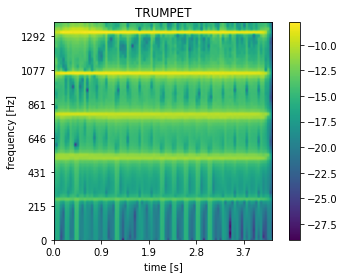

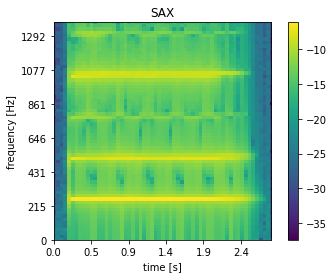

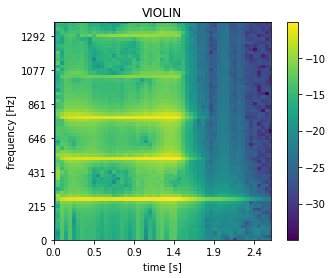

In [ ]:
oboe, fs = wav_read("oboe_C4.wav")
trumpet, fs = wav_read("trumpet_C4.wav")
sax, fs = wav_read("sax_C4.wav")
violin, fs = wav_read("violin_C4.wav")
start = 10000
end = 10000+int(fs*2*pi/261.63)
inst = [oboe, trumpet, sax, violin]
names = ["OBOE", "TRUMPET", "SAX", "VIOLIN"]
for i in range(4):
  ins = inst[i]
  name = names[i]
  samples = ins

  stft1 = stft(samples, window_size, step_size, fs)

  specgram1 = spectrogram(stft1, window_size, step_size, fs)

  plt.title(name)
  plot_spectrogram(specgram1, window_size, step_size, fs)

Here we can see better where the frequencies are. Again, we see that both have their first frequency at 261, but have various combinations of higher harmonics, leading to the different distinct sounds. 

We can now use this idea to make our tune sound like it's been played by different instruments. We have given you some helper code below for this:

In [62]:
#DO NOT MODIFY
import math
def find_dt_coeff(x_n, k, f_s):
    X_k = 0
    f = 261
    N = 2 * math.pi * f_s / f
    Omega = 2 * math.pi * f / f_s
    for n in range(20000, 20000 + int(N)):
        X_k += x_n[n] * math.e**(-1j*Omega*k*n)
    X_k = X_k / N
    return X_k

def find_all_coeffs(file):
    x_n, f_s = wav_read(file)
    X = {}
    for k in range(-10, 11):
        X_k = find_dt_coeff(x_n, k, f_s)
        X[k] = X_k
    return X

oboe_coeffs = find_all_coeffs("oboe_C4.wav")
trumpet_coeffs = find_all_coeffs("trumpet_C4.wav")
sax_coeffs = find_all_coeffs("sax_C4.wav")
violin_coeffs = find_all_coeffs("violin_C4.wav")

coeffs = {"oboe": oboe_coeffs, "trumpet": trumpet_coeffs, "sax": sax_coeffs, "violin": violin_coeffs}

def synthesize(tune, instrument):
  coef = coeffs[instrument]
  f_n = []
  f_s = 44100        #44.1kHz sampling frequency
  n_0 = 0
  N = 0
  for freq, duration in tune:
      N = int((f_s * duration) + n_0)
      Omega = ((2 * math.pi) * freq) / f_s
      for n in range(n_0, N):

          ###Using some instrument's coeffs###
          value = x_n_from_coeffs(Omega, n, coef)
          assert abs(value.imag) < 1e-12
          f_n.append(value.real)

      n_0 = N
  return f_n

def x_n_from_coeffs(Omega, n, coeffs):
    f_n = 0
    for k , X_k in coeffs.items():
        f_n += X_k * math.e**(1j*Omega*k*n)
    return f_n

/usr/local/lib/python3.7/dist-packages/lib6003-0.0.4-py3.7.egg/lib6003/wavfile.py:302: WavFileWarning: Chunk (non-data) not understood, skipping it.
  "Chunk (non-data) not understood, skipping it.", WavFileWarning


To use this code, we simply give our synthesize function a tune and an instrument name out of trumpet, violin, sax, and oboe, and it will create our file. Below we define our tune:

In [52]:
tune = [ #frequency [Hz], duration [sec]
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.6666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.16666666666666666), (440.0, 0.16666666666666666),
    (415.3, 0.16666666666666666), (369.99, 0.16666666666666666),
    (415.3, 0.3333333333333333), (369.99, 0.3333333333333333),
    (277.18, 1.3333333333333333), (246.94, 1.1666666666666665),
    (277.18, 0.16666666666666666), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.6666666666666666),
    (369.99, 0.6666666666666666), (277.18, 1.3333333333333333),
    (246.94, 1.3333333333333333), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.16666666666666666),
    (440.0, 0.16666666666666666), (415.3, 0.16666666666666666),
    (369.99, 0.16666666666666666), (415.3, 0.3333333333333333),
    (369.99, 0.3333333333333333), (277.18, 1.3333333333333333),
    (246.94, 1.1666666666666665), (277.18, 0.16666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.6666666666666666), (369.99, 0.6666666666666666),
    (277.18, 1.3333333333333333), (246.94, 1.3333333333333333),
    (277.18, 1.3333333333333333)]

To help you out, we synthesize the first instrument below:

In [ ]:
f_n = synthesize(tune, "oboe")
wav_write(f_n, 44100, "tune_oboe.wav")
IPython.display.Audio("tune_oboe.wav")

Now it's your turn to work with this code! 

In [66]:
instruments = ["oboe", "trumpet", "sax", "violin"]
#TODO: synthesize the remaining instruments and create and play their wav files.

Once you have this, listen to your resulting files!

You should be able to hear each file sounds a bit different -- although we are not able to completely replicate the sound (this is where machine learning comes in!) we are able to get a reasonably close approximation.